### Packages

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression as mutual_info
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
import time
import matplotlib
import scipy.io
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene
try:
    import seaborn as sns
    use_seaborn = True
    sns.set()
except:
    use_seaborn = False
    
import warnings
warnings.filterwarnings('ignore')

### Data Engineering

In [2]:
Ximg1 = pd.read_csv(f"C:\\Users\\kaczb\\Desktop\\Machine learning\\data\\data\\Ximg1.csv")
Xtab1 = pd.read_csv(f"C:\\Users\\kaczb\\Desktop\\Machine learning\\data\\data\\Xtab1.csv")
Y1 = pd.read_csv(f"C:\\Users\\kaczb\\Desktop\\Machine learning\\data\\data\\Y1.csv", header = None)

Ximg2 = pd.read_csv(f"C:\\Users\\kaczb\\Desktop\\Machine learning\\data\\data\\Ximg2.csv")
Xtab2 = pd.read_csv(f"C:\\Users\\kaczb\\Desktop\\Machine learning\\data\\data\\Xtab2.csv")

Ximg1 = Ximg1.drop('img_filename', axis = 1)
Xtab1 = Xtab1.drop('img_filename', axis = 1)
Ximg2 = Ximg2.drop('img_filename', axis = 1)
Xtab2 = Xtab2.drop('img_filename', axis = 1)

X = pd.concat([Xtab1,Ximg1], axis = 1)
X2 = pd.concat([Xtab2,Ximg2], axis = 1)
X.head()

,age,blood pressure,blood type,cholesterol,hemoglobin,physical activity,sarsaparilla,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,h1,h2,h3,h4,h5,h6,h7,h8
0,113,94.65,O+,103.63,14.32,No,Moderate,High,High,36.40,891.91,101.34,-0.400470,0.115542,-0.429741,0.391250,0.274615,-0.302454,0.172267,-0.285046
1,160,102.33,AB+,131.44,15.85,Yes,Very low,High,Very high,37.17,672.22,117.66,-0.370681,0.109838,-0.413651,0.425773,0.218042,-0.278049,0.181184,-0.212044
2,193,121.94,A+,156.47,13.02,No,Very high,Moderate,Very high,36.84,951.98,111.73,-0.351391,0.043292,-0.394782,0.379718,0.191864,-0.226267,0.145120,-0.253251
3,130,96.02,O+,126.46,12.91,Yes,Low,High,High,37.89,609.18,80.75,-0.346954,0.077403,-0.428344,0.384614,0.244609,-0.259138,0.169757,-0.293084
4,145,92.00,B+,102.23,14.72,Yes,Very low,Low,High,37.40,573.76,77.11,-0.368318,0.089293,-0.421365,0.402795,0.243602,-0.224189,0.157585,-0.300966


#### Visual descriptive analysis

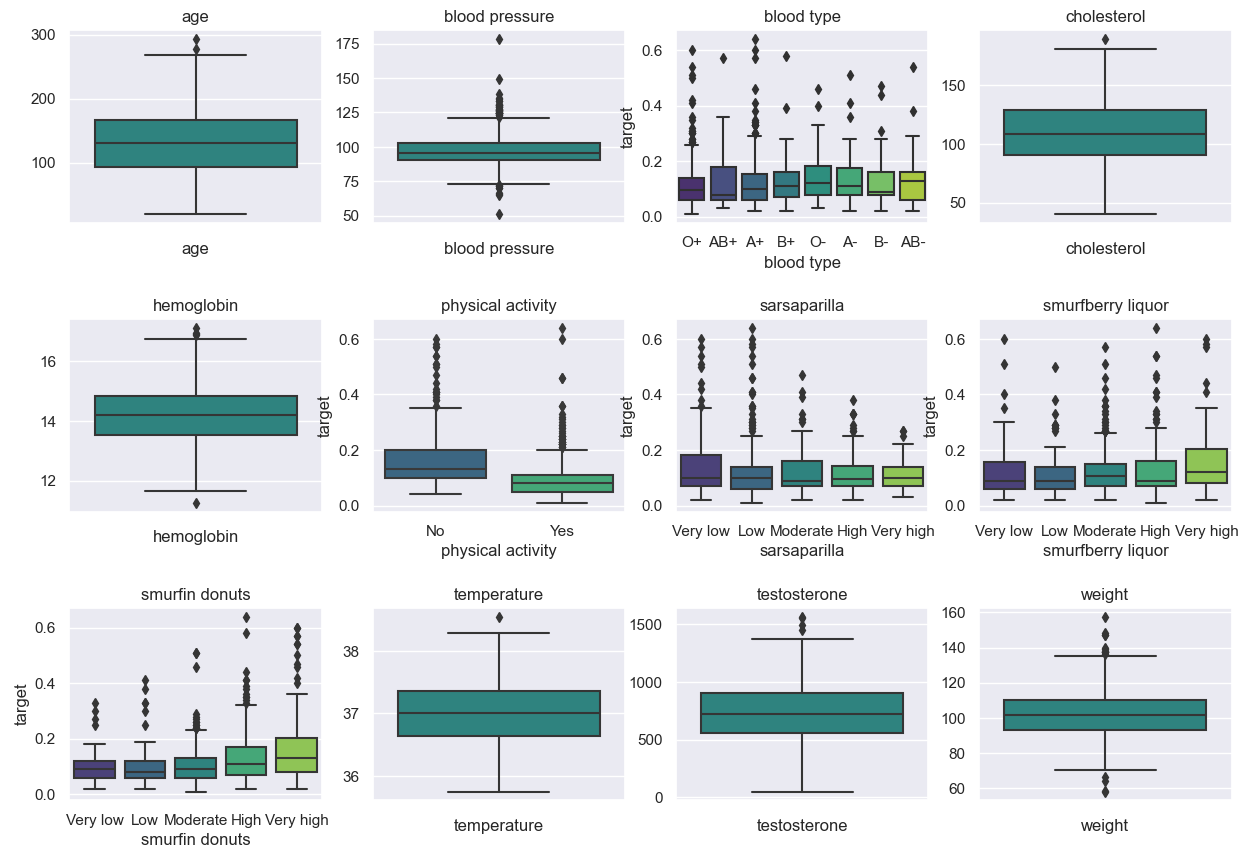

In [3]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

names_X1 = Xtab1.columns.tolist()

categorie_order = {"sarsaparilla": ["Very low", "Low", "Moderate", "High", "Very high"],
                   "smurfberry liquor": ["Very low", "Low", "Moderate", "High", "Very high"],
                   "smurfin donuts": ["Very low", "Low", "Moderate", "High", "Very high"]}

for i, col in enumerate(names_X1):
    if pd.api.types.is_numeric_dtype(Xtab1[col]):
        sns.boxplot(y=Xtab1[col], ax=axes[i // 4, i % 4], palette='viridis')
        axes[i // 4, i % 4].set_title(col)
        axes[i // 4, i % 4].set_xlabel(col)
        axes[i // 4, i % 4].set_ylabel(' ')
    elif col in categorie_order:
        sns.boxplot(x= Xtab1[col], y= Y1[0], ax=axes[i // 4, i % 4], data=Xtab1, order=categorie_order[col], palette='viridis')
        axes[i // 4, i % 4].set_title(col)
        axes[i // 4, i % 4].set_xlabel(col)
        axes[i // 4, i % 4].set_ylabel('target')
    else:
        sns.boxplot(x= Xtab1[col], y= Y1[0], ax=axes[i // 4, i % 4], data=Xtab1, palette='viridis')
        axes[i // 4, i % 4].set_title(col)
        axes[i // 4, i % 4].set_xlabel(col)
        axes[i // 4, i % 4].set_ylabel('target')
plt.show()

#### Anova

In [4]:
X1_anova = pd.concat([Xtab1,Y1], axis = 1)
cat_var = ['blood type', 'physical activity', 'smurfin donuts', 'smurfberry liquor', 'sarsaparilla']
results_anova=[]
for var in cat_var : 
    result_anova = f_oneway(*[group[0].values for name, group in X1_anova.groupby(var)])
    results_anova.append((var, result_anova.statistic, result_anova.pvalue))

for cat_col, stat, p_value in results_anova:
    print(f"ANOVA pour {cat_col}:")
    print("Statistique de test F :", stat)
    print("p-value :", p_value)
    print("\n")

ANOVA pour blood type:
Statistique de test F : 0.45155370042919707
p-value : 0.8693760758871365


ANOVA pour physical activity:
Statistique de test F : 119.36045775208791
p-value : 5.44217831252902e-26


ANOVA pour smurfin donuts:
Statistique de test F : 12.344069772778683
p-value : 9.60453896464257e-10


ANOVA pour smurfberry liquor:
Statistique de test F : 3.134746180739271
p-value : 0.014259107798828588


ANOVA pour sarsaparilla:
Statistique de test F : 1.6273273775736938
p-value : 0.1653615385259415




The anova confirms what we see on the graphs: we blood type and sarsaparilla do not have influence on the target. But let's verify the hypothesis of Anova before remove it from the data set.

1) Homoscedasticity 

In [5]:
cat_var = ['blood type', 'physical activity', 'smurfin donuts', 'smurfberry liquor', 'sarsaparilla']
results_levene=[]
for var in cat_var : 
    grouped_data = [group[0].values for name, group in X1_anova.groupby(var)]
    result_levene = statistic, p_value = levene(*grouped_data)
    results_levene.append((var, statistic,p_value))

for cat_col, stat, p_value in results_levene:
    print("\n")
    print(f"Levene pour {cat_col}:")
    print("Statistique de test F :", stat)
    print("p-value :", p_value)
    alpha = 0.05
    if p_value < alpha:
        print("L'homoscédasticité n'est pas respectée.")
    else:
        print("Les variances des groupes sont similaires.")



Levene pour blood type:
Statistique de test F : 0.3292007058731629
p-value : 0.9408269492657644
Les variances des groupes sont similaires.


Levene pour physical activity:
Statistique de test F : 18.568746740705897
p-value : 1.8434788215049874e-05
L'homoscédasticité n'est pas respectée.


Levene pour smurfin donuts:
Statistique de test F : 8.194397560572918
p-value : 1.7742029808575564e-06
L'homoscédasticité n'est pas respectée.


Levene pour smurfberry liquor:
Statistique de test F : 2.104631507850099
p-value : 0.07845759436326238
Les variances des groupes sont similaires.


Levene pour sarsaparilla:
Statistique de test F : 2.517618688643796
p-value : 0.040095600859420204
L'homoscédasticité n'est pas respectée.


2) Kruskal Walis for variables not respecting hocedasticity

In [6]:
from scipy.stats import kruskal

cat_var_kw = ['physical activity', 'smurfin donuts', 'sarsaparilla']
results_kw=[]
for var in cat_var_kw : 
    grouped_data = [group[0].values for name, group in X1_anova.groupby(var)]
    statistic_kw, p_value_kw = kruskal(*grouped_data)
    results_kw.append((var, statistic_kw,p_value_kw))

for cat_col, stat, p_value in results_kw:
    print("\n")
    print(f"Kruskal Walis pour {cat_col}:")
    print("Statistique de test KW :", stat)
    print("p-value :", p_value)
    alpha = 0.05
    if p_value < alpha:
        print("différences significatives entre au moins deux groupes")
    else:
        print("pas suffisamment de preuves pour rejeter l'hypothèse nulle")



Kruskal Walis pour physical activity:
Statistique de test KW : 173.12433209247195
p-value : 1.537505273094689e-39
différences significatives entre au moins deux groupes


Kruskal Walis pour smurfin donuts:
Statistique de test KW : 44.87337455543878
p-value : 4.224416675072913e-09
différences significatives entre au moins deux groupes


Kruskal Walis pour sarsaparilla:
Statistique de test KW : 2.076503156891972
p-value : 0.7216902797991129
pas suffisamment de preuves pour rejeter l'hypothèse nulle


We remove sarsaparilla and blood type

In [7]:
X = X.drop(['blood type', 'sarsaparilla'], axis = 1)
X2 = X2.drop(['blood type', 'sarsaparilla'], axis = 1)

print(X)

     age  blood pressure  cholesterol  hemoglobin physical activity  \
0    113           94.65       103.63       14.32                No   
1    160          102.33       131.44       15.85               Yes   
2    193          121.94       156.47       13.02                No   
3    130           96.02       126.46       12.91               Yes   
4    145           92.00       102.23       14.72               Yes   
..   ...             ...          ...         ...               ...   
795   87           98.68       120.51       15.84                No   
796  134           85.93        89.01       13.47               Yes   
797  162           96.03       111.62       14.15               Yes   
798   89           97.48        87.38       13.03                No   
799  143           88.07       125.24       16.33               Yes   

    smurfberry liquor smurfin donuts  temperature  testosterone  weight  \
0                High           High        36.40        891.91  101.34 

#### Treatment of categorical variables

In [8]:
activity_mapping = {'No': 1, 'Yes': 2}
level_mapping = {'Very low': 1, 'Low': 2, 'Moderate': 3, 'High': 4, 'Very high': 5}

In [9]:
X['physical activity'] = X['physical activity'].replace(activity_mapping)
X['smurfberry liquor'] = X['smurfberry liquor'].replace(level_mapping)
X['smurfin donuts'] = X['smurfin donuts'].replace(level_mapping)

In [10]:
X2['physical activity'] = X2['physical activity'].replace(activity_mapping)
X2['smurfberry liquor'] = X2['smurfberry liquor'].replace(level_mapping)
X2['smurfin donuts'] = X2['smurfin donuts'].replace(level_mapping)

#### Missing value and Outliers

1) Missing Value

In [11]:
X.isnull().sum()

age                  0
blood pressure       0
cholesterol          0
hemoglobin           0
physical activity    0
smurfberry liquor    0
smurfin donuts       0
temperature          0
testosterone         0
weight               0
h1                   0
h2                   0
h3                   0
h4                   0
h5                   0
h6                   0
h7                   0
h8                   0
dtype: int64

In [12]:
X2.isnull().sum()

age                  0
blood pressure       0
cholesterol          0
hemoglobin           0
physical activity    0
smurfberry liquor    0
smurfin donuts       0
temperature          0
testosterone         0
weight               0
h0                   0
h1                   0
h2                   0
h3                   0
h4                   0
h5                   0
h6                   0
h7                   0
dtype: int64

2) Outliers 

In [13]:
X.describe(percentiles=[0.05,0.95])

,age,blood pressure,cholesterol,hemoglobin,physical activity,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,h1,h2,h3,h4,h5,h6,h7,h8
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,130.833750,97.514163,109.846100,14.209737,1.545000,3.237500,3.487500,37.004325,730.344775,102.040325,-0.370976,0.078378,-0.415801,0.405210,0.253208,-0.268859,0.174954,-0.253636
std,51.057121,11.703129,26.793242,0.978690,0.498282,1.141369,1.264651,0.503774,266.204288,13.695318,0.031431,0.029292,0.041881,0.034345,0.042581,0.038377,0.029358,0.060983
min,20.000000,51.230000,40.350000,11.260000,1.000000,1.000000,1.000000,35.750000,50.000000,58.160000,-0.476663,0.004997,-0.563539,0.340089,0.179231,-0.381955,0.111091,-0.423687
5%,47.950000,81.918500,67.726500,12.639000,1.000000,1.000000,1.000000,36.180000,272.954000,80.202500,-0.429662,0.034025,-0.496569,0.360050,0.200496,-0.337534,0.137428,-0.364960
50%,131.500000,95.560000,108.780000,14.190000,2.000000,3.000000,4.000000,37.000000,726.285000,101.820000,-0.367222,0.076238,-0.406837,0.399853,0.242204,-0.264544,0.169084,-0.250947
95%,216.050000,117.424000,155.783000,15.880500,2.000000,5.000000,5.000000,37.820000,1165.460500,125.500500,-0.327169,0.131912,-0.363793,0.471536,0.339549,-0.215741,0.230708,-0.169289
max,293.000000,178.310000,189.180000,17.120000,2.000000,5.000000,5.000000,38.550000,1568.240000,157.680000,-0.276375,0.166099,-0.333544,0.518287,0.407305,-0.163310,0.285407,-0.132603


In [14]:
X2.describe(percentiles=[0.05,0.95])

,age,blood pressure,cholesterol,hemoglobin,physical activity,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,h0,h1,h2,h3,h4,h5,h6,h7
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,127.245000,97.310175,110.834450,14.27640,1.530000,3.305000,3.480000,36.991750,744.735575,101.711900,-0.369686,0.079153,-0.413277,0.404030,0.251156,-0.267290,0.175628,-0.251791
std,51.326758,12.721333,27.710974,1.00685,0.499724,1.162046,1.331929,0.497999,253.811689,13.480142,0.032638,0.028465,0.040490,0.033792,0.039751,0.039158,0.029452,0.059488
min,20.000000,54.210000,44.860000,11.20000,1.000000,1.000000,1.000000,35.540000,50.000000,58.500000,-0.476483,0.013362,-0.544489,0.338803,0.184295,-0.392043,0.111771,-0.413359
5%,42.000000,79.399500,66.588500,12.63950,1.000000,1.000000,1.000000,36.169500,339.375000,80.618000,-0.428309,0.036653,-0.487259,0.358961,0.201490,-0.335401,0.136178,-0.359935
50%,126.500000,95.725000,110.095000,14.28500,2.000000,3.000000,4.000000,36.980000,743.875000,102.040000,-0.366192,0.077178,-0.402780,0.399104,0.240608,-0.262370,0.169884,-0.249053
95%,218.050000,120.376500,156.934500,15.81100,2.000000,5.000000,5.000000,37.810500,1171.717500,124.288000,-0.321007,0.129183,-0.361461,0.467993,0.328305,-0.207363,0.235202,-0.167919
max,266.000000,158.660000,183.950000,17.42000,2.000000,5.000000,5.000000,38.260000,1400.960000,144.880000,-0.289145,0.157718,-0.337600,0.515493,0.392010,-0.179385,0.268500,-0.138938


#### Feature transformation

Correlation matrix

Text(0.5, 1.0, 'Correlation matrix')

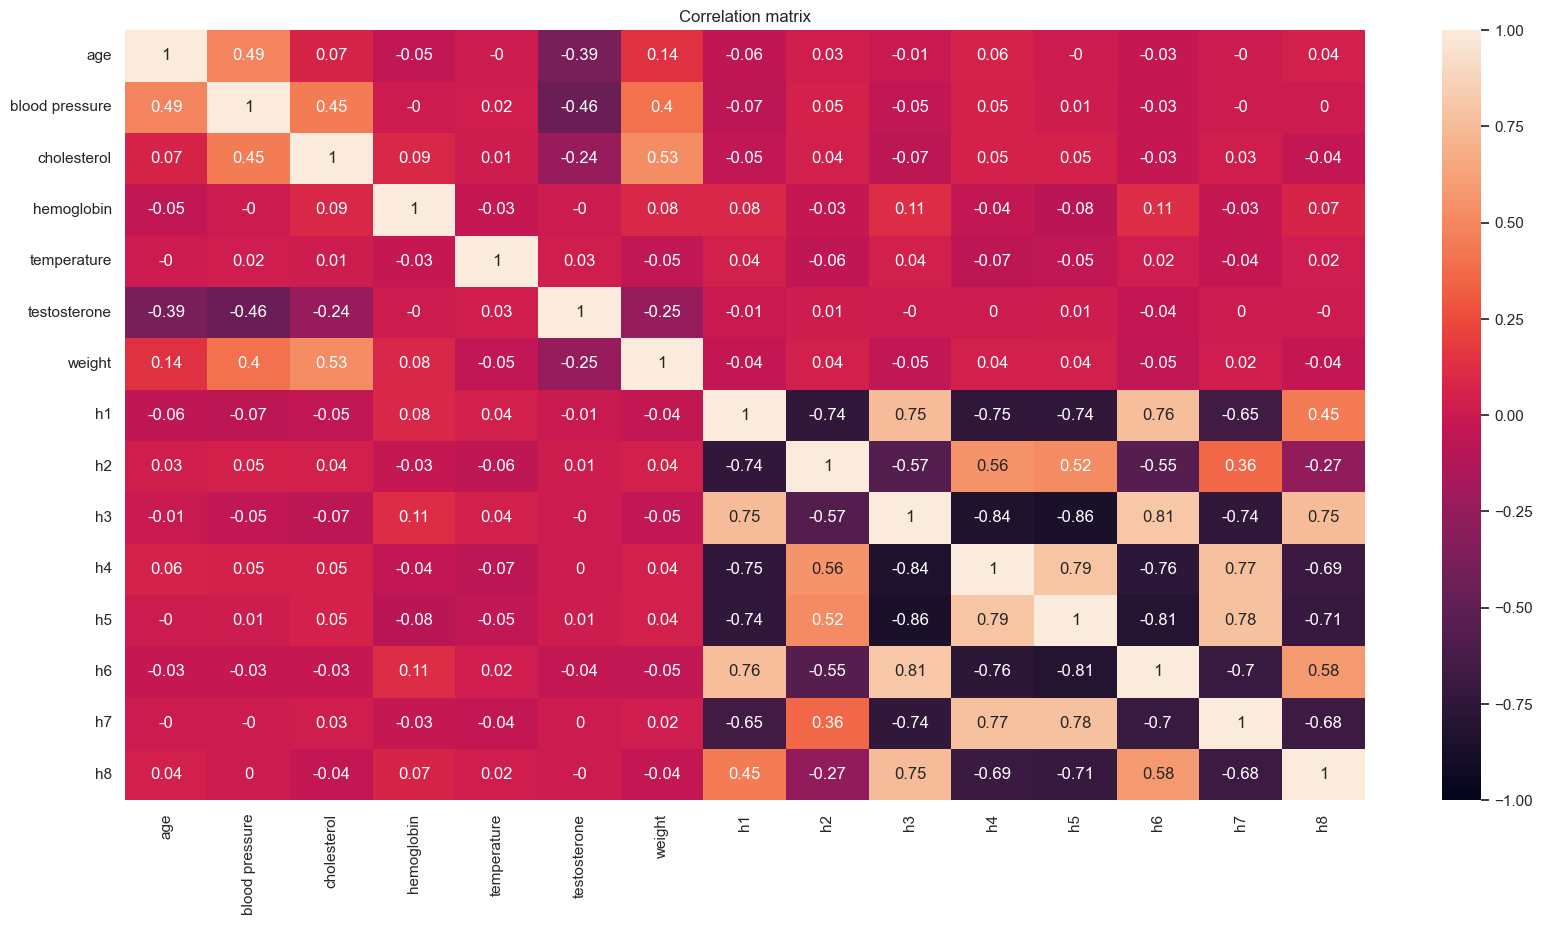

In [15]:
corr_tot = pd.concat([Xtab1,Ximg1], axis=1).corr().round(2)
plt.figure(figsize=(20,10))
heatmap_h1 = sns.heatmap(data=corr_tot, vmin=-1, vmax=1, annot = True)
heatmap_h1.set_title("Correlation matrix")

#### PCA

On the correlation matrix, we see that there is high correletion between the h_i this leads to multicolinearity problems. So we perform PCA on the h_i to solve this problem.

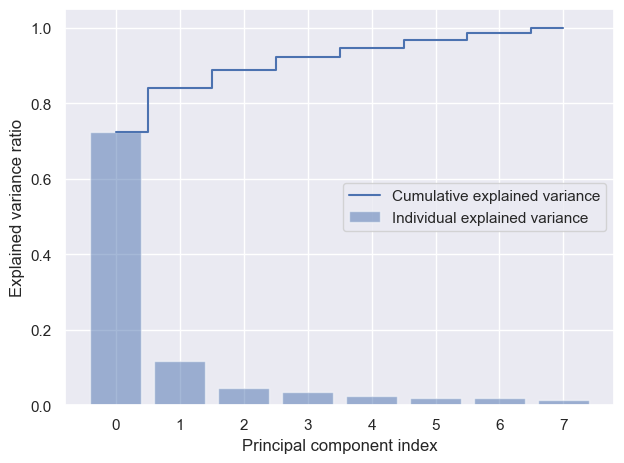

In [16]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Ximg1_scaled = scaler.fit_transform(Ximg1)

scaler2 = StandardScaler()
Ximg2_scaled = scaler2.fit_transform(Ximg2)

pca = sklearnPCA()
Y_sklearn = pca.fit_transform(Ximg1_scaled)

pca2 = sklearnPCA()
Y_sklearn2 = pca2.fit_transform(Ximg2_scaled)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We need to keep 2 components to have enough variance explained.

In [17]:
num_components_to_keep = 2

Ximg1_pca = pca.transform(Ximg1_scaled)[:,:num_components_to_keep]
print("Nouvelles variables après PCA :")
print(Ximg1_pca)
Ximg1_pca = pd.DataFrame(Ximg1_pca, columns=['h1_pca', 'h2_pca'])

Ximg2_pca = pca2.transform(Ximg2_scaled)[:,:num_components_to_keep]
Ximg2_pca = pd.DataFrame(Ximg2_pca, columns=['h1_pca', 'h2_pca'])

Nouvelles variables après PCA :
[[ 1.30253586 -0.99449989]
 [ 0.1301771  -1.11416526]
 [-2.34505278  0.61741064]
 ...
 [ 1.239887    0.94279229]
 [-2.70676795 -0.53934861]
 [ 7.72543291  0.14612164]]


In [18]:
X = X.drop(['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8'], axis = 1)
X = pd.concat([X, Ximg1_pca], axis = 1)

The data set after the Anova and the PCA is 

In [19]:
X.head()

,age,blood pressure,cholesterol,hemoglobin,physical activity,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,h1_pca,h2_pca
0,113,94.65,103.63,14.32,1,4,4,36.40,891.91,101.34,1.302536,-0.994500
1,160,102.33,131.44,15.85,2,4,5,37.17,672.22,117.66,0.130177,-1.114165
2,193,121.94,156.47,13.02,1,3,5,36.84,951.98,111.73,-2.345053,0.617411
3,130,96.02,126.46,12.91,2,4,4,37.89,609.18,80.75,-0.422192,0.590030
4,145,92.00,102.23,14.72,2,2,4,37.40,573.76,77.11,-0.381014,0.055217


In [20]:
X2 = X2.drop(['h0','h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7'], axis = 1)
X2 = pd.concat([X2, Ximg2_pca], axis = 1)
X2.head()

,age,blood pressure,cholesterol,hemoglobin,physical activity,smurfberry liquor,smurfin donuts,temperature,testosterone,weight,h1_pca,h2_pca
0,121,107.09,96.42,17.07,1,5,2,36.65,422.49,88.67,1.417184,-1.098220
1,105,97.70,135.89,13.81,1,3,5,36.58,578.21,105.05,-2.334002,0.636622
2,111,101.99,145.79,15.16,1,3,5,36.20,536.38,127.14,-3.540541,1.949245
3,99,91.47,65.80,14.41,1,3,1,37.27,700.61,113.87,-1.406089,0.553353
4,202,107.42,108.05,13.85,1,5,4,37.38,414.73,93.51,3.887895,-0.570962


### Train test split 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2)

### Scaling

In [22]:
scX = StandardScaler()
scX.fit(X_train)
X_train = pd.DataFrame(scX.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scX.transform(X_test), columns=X_test.columns)

scY = StandardScaler()
scY.fit(y_train)
y_train = pd.DataFrame(scY.transform(y_train), columns=y_train.columns)
y_test = pd.DataFrame(scY.transform(y_test), columns=y_test.columns)

### Correlation filter 

In [23]:
correlation_threshold = 0.2
corr = X_train.corrwith(y_train[0])
selected_features_corr = list(corr[corr.abs() >= correlation_threshold].index)

print("Selected features :")
print(selected_features_corr)

Selected features :
['age', 'blood pressure', 'cholesterol', 'physical activity', 'smurfin donuts', 'testosterone', 'weight', 'h1_pca']


### Mutual info filter 

Mutual info mean :
h1_pca               0.258478
physical activity    0.141745
weight               0.126372
blood pressure       0.096429
cholesterol          0.095219
smurfin donuts       0.051357
age                  0.045047
h2_pca               0.037100
testosterone         0.014373
smurfberry liquor    0.012372
temperature          0.007430
hemoglobin           0.001180
dtype: float64


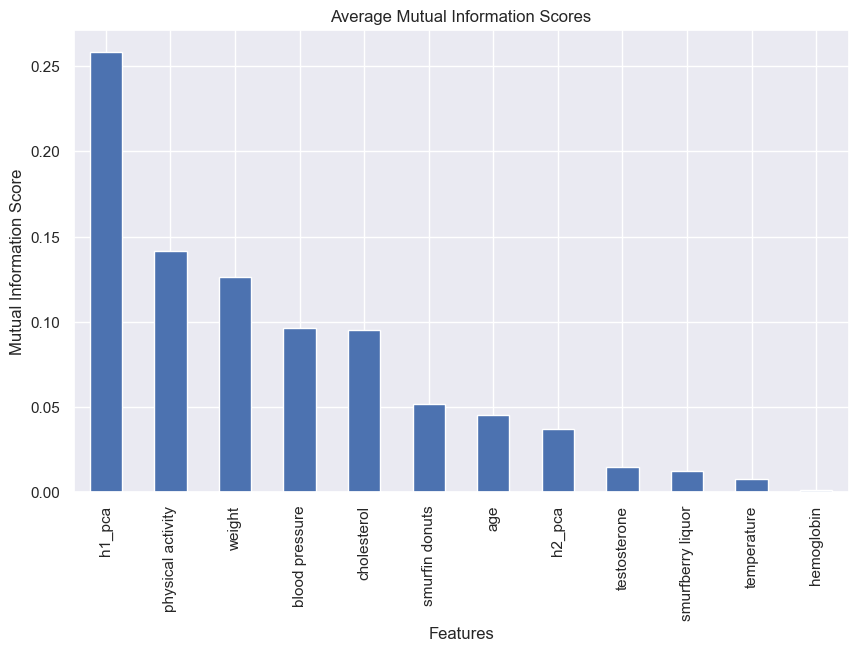

Selected features :
['h1_pca', 'physical activity', 'weight', 'blood pressure', 'cholesterol', 'smurfin donuts', 'age', 'h2_pca']


In [24]:
n_features = len(selected_features_corr)
num_iterations = 100
mi_sum = pd.Series(0, index=X_train.columns)

for _ in range(num_iterations):
    mi = pd.Series(mutual_info(X_train.values, y_train.values.ravel()), index=X_train.columns)
    mi_sum += mi

mi_avg = mi_sum / num_iterations
mi_avg = mi_avg.sort_values(ascending=False)

print("Mutual info mean :")
print(mi_avg)

plt.figure(figsize=(10, 6))
mi_avg.plot(kind='bar')
plt.title('Average Mutual Information Scores')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.show()

selected_features_mi = list(mi_avg.sort_values(ascending=False)[:n_features].index)

print("Selected features :")
print(selected_features_mi)

In [25]:
selected_features_mi

['h1_pca',
 'physical activity',
 'weight',
 'blood pressure',
 'cholesterol',
 'smurfin donuts',
 'age',
 'h2_pca']

### Max relevance min redondance

Mean of selected features :
age                  100
blood pressure       100
cholesterol           95
hemoglobin             1
physical activity    100
smurfberry liquor     24
smurfin donuts         5
temperature           13
testosterone          62
weight               100
h1_pca               100
h2_pca               100
dtype: int64


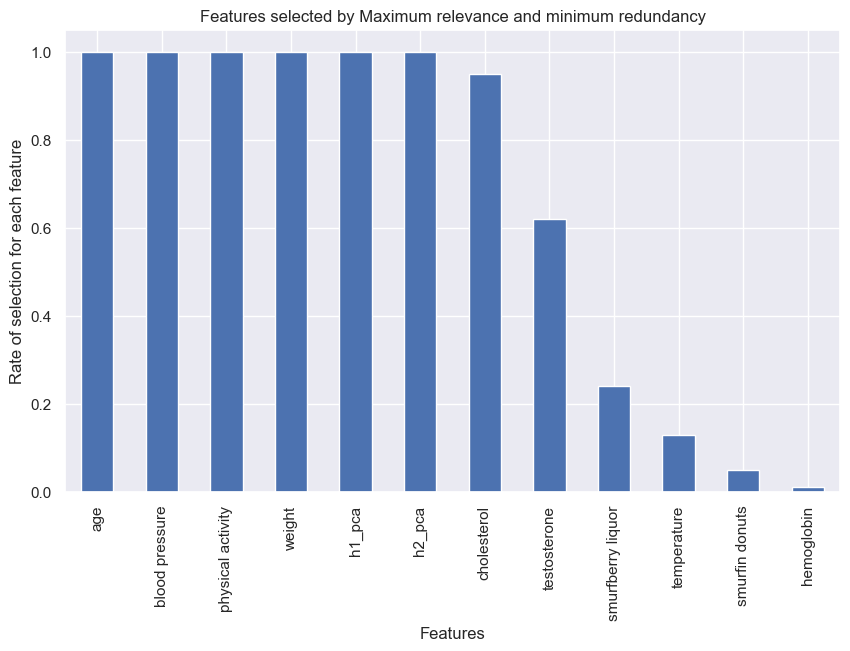

In [26]:
n_features = len(selected_features_corr)
num_iterations = 100
selected_features_sum = pd.Series(0, index=X_train.columns)  

for _ in range(num_iterations):
    mi = pd.Series(mutual_info_regression(X_train.values, y_train.values.ravel()), index=X_train.columns)
    ranked_features = list(mi.sort_values(ascending=False).index)

    corr = X_train.corr()
    corr_threshold = 0.6
    
    selected_features_mixt = []

    for feature in ranked_features:
        n_selected = len(selected_features_mixt)
        if n_selected == n_features:
            break 
        elif n_selected == 0:
            selected_features_mixt.append(feature)
        else:
            feature_is_redundant = False
            for selected_feature in selected_features_mixt:
                if np.abs(corr[feature][selected_feature]) > corr_threshold:
                    feature_is_redundant = True
                    break
            if not feature_is_redundant:
                selected_features_mixt.append(feature)

    selected_features_sum += pd.Series(1, index=selected_features_mixt).reindex(selected_features_sum.index, fill_value=0)

# Mean of selected features
selected_features_avg = selected_features_sum / num_iterations
selected_features_avg = selected_features_avg.sort_values(ascending=False)

# Show result
print("Mean of selected features :")
print(selected_features_sum)

plt.figure(figsize=(10, 6))
selected_features_avg.plot(kind='bar')
plt.title('Features selected by Maximum relevance and minimum redundancy')
plt.xlabel('Features')
plt.ylabel('Rate of selection for each feature')
plt.show()


In [27]:
print("Selected Features with correlation filter :")
print(selected_features_corr)
print("Selected Features with mutual information filter :")
print(selected_features_mi)

Selected Features with correlation filter :
['age', 'blood pressure', 'cholesterol', 'physical activity', 'smurfin donuts', 'testosterone', 'weight', 'h1_pca']
Selected Features with mutual information filter :
['h1_pca', 'physical activity', 'weight', 'blood pressure', 'cholesterol', 'smurfin donuts', 'age', 'h2_pca']


With this three filter we kept : 

In [28]:
selected_features = [feature for feature, value in selected_features_sum.items() if value > 50]
print(selected_features)

['age', 'blood pressure', 'cholesterol', 'physical activity', 'testosterone', 'weight', 'h1_pca', 'h2_pca']


In [29]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_train.head()

X2 = X2[selected_features]

In [30]:
y_train = pd.DataFrame(scY.inverse_transform(y_train))
y_test = pd.DataFrame(scY.inverse_transform(y_test))

In [31]:
def evaluate_feature_selection(X_train, X_test, y_train, y_test, model, selected_features):

    model.fit(X_train[selected_features].values, y_train.values.ravel())
    
    y_pred = model.predict(X_test[selected_features].values) 
    rmse = np.sqrt(np.mean((y_pred-y_test.values.ravel() )**2))
    
    return rmse

### Linear regression

In [32]:
start_time = time.time()


reg = LinearRegression()

reg.fit(X_train, y_train)
pred_train = reg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))

reg.fit(X_test, y_test)
pred_test = reg.predict(X_test)
rmse_test_linreg = np.sqrt(mean_squared_error(y_test, pred_test))

print(f"RMSE for training set: {rmse_train}")
print(f"RMSE for test set: {rmse_test_linreg}")

print("--- %s seconds ---" % (time.time() - start_time))

RMSE for training set: 0.057278135932236504
RMSE for test set: 0.04682249932447918
--- 0.016500473022460938 seconds ---


In [33]:
l = [i/100 for i in range(0, 70, 3)]

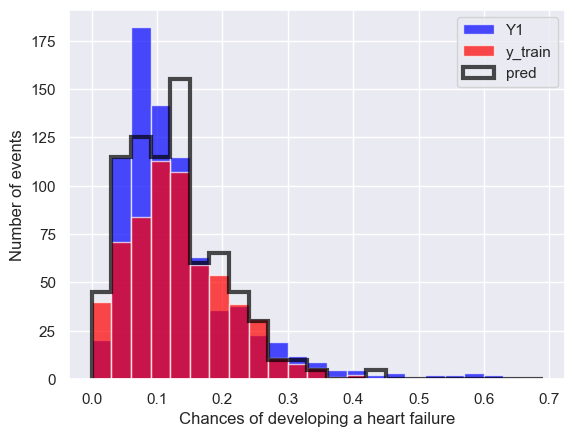

In [34]:
plt.hist(Y1,bins = l, color='blue', alpha=0.7, label='Y1')
plt.hist(pred_train,bins = l, color='red', alpha=0.7, label='y_train')
plt.hist(np.concatenate((pred_test,pred_test,pred_test,pred_test,pred_test)),bins = l, color='black', alpha=0.7, label='pred', histtype='step', edgecolor='black',linewidth=3)

plt.xlabel('Chances of developing a heart failure')
plt.ylabel('Number of events')

plt.legend()
plt.show()

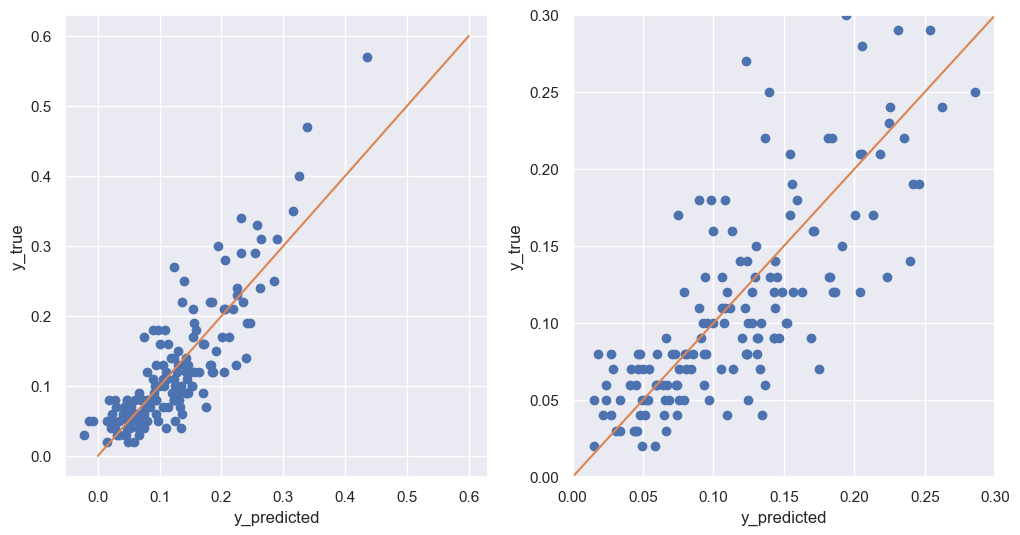

In [35]:
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

axis[0].plot(pred_test, y_test, marker='o', linestyle='None')
axis[0].plot([0, 0.4, 0.6], [0, 0.4, 0.6])
axis[0].set_xlabel("y_predicted")
axis[0].set_ylabel("y_true")

axis[1].plot(pred_test, y_test, marker='o', linestyle='None')
axis[1].plot([0, 0.3], [0, 0.3])
axis[1].set_xlim(0, 0.3)
axis[1].set_ylim(0, 0.3)
axis[1].set_xlabel("y_predicted")
axis[1].set_ylabel("y_true")

plt.show()

In [36]:
rmse_list = []
for i in range(1,len(selected_features)):
    feature_to_select = i
    sfs = SequentialFeatureSelector(estimator = reg, 
                                    n_features_to_select=feature_to_select, 
                                    scoring = "neg_root_mean_squared_error",
                                   direction = "forward",
                                   cv = 2)
    sfs.fit(X_train,y_train)
    feat = X_train.columns[sfs.get_support()]
    r = evaluate_feature_selection(X_train, X_test, y_train, y_test, reg, feat)
    rmse_list.append([r,i,X_train.columns[sfs.get_support()]])

print(min(rmse_list))

[0.05097382009873635, 6, Index(['blood pressure', 'cholesterol', 'physical activity', 'weight',
       'h1_pca', 'h2_pca'],
      dtype='object')]


### SGD

In [37]:
start_time = time.time()
sgd = make_pipeline(StandardScaler(), SGDRegressor(max_iter=200, learning_rate = 'adaptive'))


sgd_pred_train = sgd.fit(X_train, y_train ).predict(X_train)
rmse_train_sgd = np.sqrt(mean_squared_error(y_train, sgd_pred_train))

sgd_pred_test = sgd.fit(X_test, y_test).predict(X_test)
rmse_test_sgd = np.sqrt(mean_squared_error(y_test, sgd_pred_test))

print(f"RMSE for training set (SGD): {rmse_train_sgd}")
print(f"RMSE for test set (SGD): {rmse_test_sgd}")

print("--- %s seconds ---" % (time.time() - start_time))

RMSE for training set (SGD): 0.057280713848580904
RMSE for test set (SGD): 0.04682575009792189
--- 0.015423059463500977 seconds ---


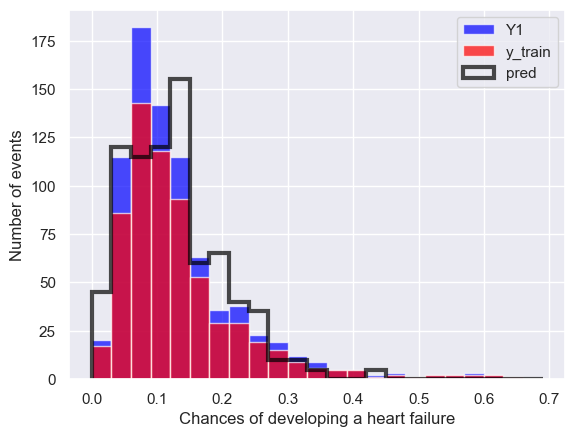

In [38]:
plt.hist(Y1,bins = l, color='blue', alpha=0.7, label='Y1')
plt.hist(y_train,bins = l, color='red', alpha=0.7, label='y_train')
plt.hist(np.concatenate([sgd_pred_test,sgd_pred_test,sgd_pred_test,sgd_pred_test,sgd_pred_test]), bins=l, color='black', alpha=0.7, label='pred', histtype='step', edgecolor='black', linewidth=3)
plt.xlabel('Chances of developing a heart failure')
plt.ylabel('Number of events')

plt.legend()
plt.show()

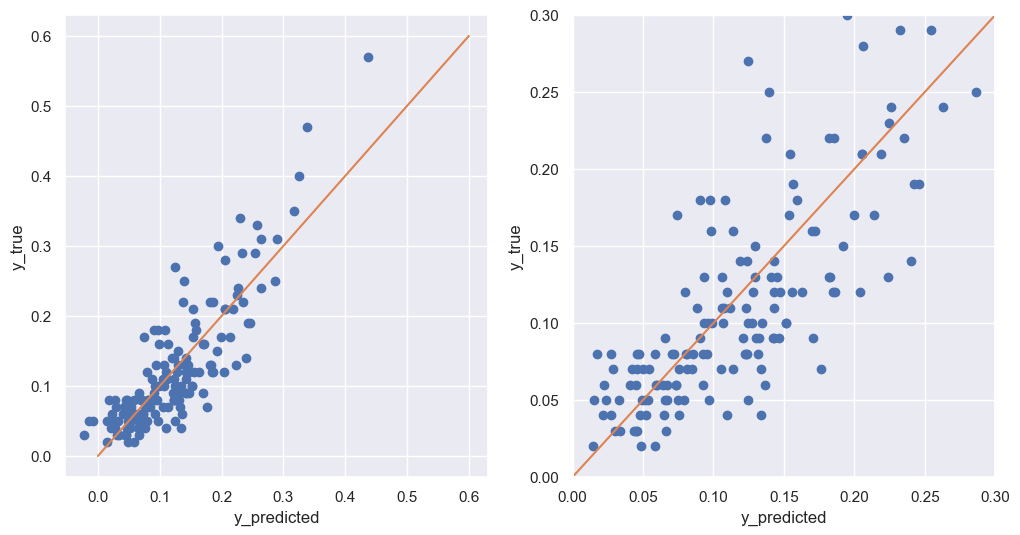

In [39]:
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

axis[0].plot(sgd_pred_test, y_test, marker='o', linestyle='None')
axis[0].plot([0, 0.4, 0.6], [0, 0.4, 0.6])
axis[0].set_xlabel("y_predicted")
axis[0].set_ylabel("y_true")

axis[1].plot(sgd_pred_test, y_test, marker='o', linestyle='None')
axis[1].plot([0, 0.3], [0, 0.3])
axis[1].set_xlim(0, 0.3)
axis[1].set_ylim(0, 0.3)
axis[1].set_xlabel("y_predicted")
axis[1].set_ylabel("y_true")

plt.show()

In [40]:
it_l = [25,50,100,150,200,300,500]
lr_l = ['invscaling', 'constant', 'optimal', 'adaptive']
lf_l = ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
        
best_rmse = []
hyp_sgd = []

for i in it_l :
        print(i)
        for j in lr_l :
            for k in lf_l :
                sgd = make_pipeline(StandardScaler(), SGDRegressor(loss = k, max_iter = i, learning_rate = j))
                #sgd = SGDRegressor(max_iter = 200, tol = 1e-3)

                sgd_pred_train = sgd.fit(X_train, y_train ).predict(X_train)
                rmse_train_sgd = np.sqrt(mean_squared_error(y_train, sgd_pred_train))

                sgd_pred_test = sgd.fit(X_test, y_test).predict(X_test)
                rmse_test_sgd = np.sqrt(mean_squared_error(y_test, sgd_pred_test))
                best_rmse.append(rmse_test_sgd)
                hyp_sgd.append([i, j, k])

min_index_sgd = best_rmse.index(min(best_rmse))
print(best_rmse[min_index_sgd], hyp_sgd[min_index_sgd])

25
50
100
150
200
300
500
0.04150516511612317 [50, 'adaptive', 'squared_error']


In [41]:
rmse_list = []
for i in range(1,len(selected_features)):
    feature_to_select = i
    sfs = SequentialFeatureSelector(estimator = sgd, 
                                    n_features_to_select=feature_to_select, 
                                    scoring = "neg_root_mean_squared_error",
                                   direction = "forward",
                                   cv = 2)
    sfs.fit(X_train,y_train)
    feat = X_train.columns[sfs.get_support()]
    r = evaluate_feature_selection(X_train, X_test, y_train, y_test, reg, feat)
    rmse_list.append([r,i,X_train.columns[sfs.get_support()]])

print(min(rmse_list))

[0.0485072992150355, 7, Index(['blood pressure', 'cholesterol', 'physical activity', 'testosterone',
       'weight', 'h1_pca', 'h2_pca'],
      dtype='object')]


### MLP

In [40]:
def compute_rmse(predict, target):
    if len(target.shape) == 2:
        target = target.squeeze()
    if len(predict.shape) == 2:
        predict = predict.squeeze()
    diff = target - predict
    if len(diff.shape) == 1:
        diff = np.expand_dims(diff, axis=-1)
    rmse = np.sqrt(diff.T@diff / diff.shape[0])
    return np.sqrt((diff**2).sum()/len(target))

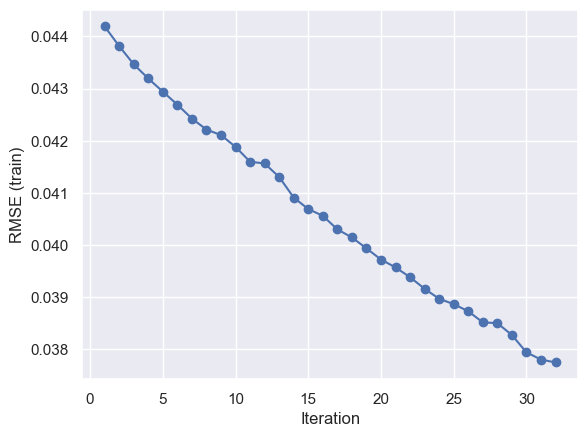

RMSE on train set: 0.03774
RMSE on test set:  0.04138
--- 0.6542997360229492 seconds ---


In [41]:
import warnings
warnings.filterwarnings('ignore')

start_time = time.time()

mlp = MLPRegressor(hidden_layer_sizes = (128,128), 
                   learning_rate = "adaptive",
                   learning_rate_init=0.01, 
                   max_iter=32)  

mlp.fit(X_train,y_train)

y_pred_train = mlp.predict(X_train)
rmse_train = compute_rmse(y_pred_train,y_train)

y_pred_test = mlp.predict(X_test)
rmse_test_mlp = compute_rmse(y_pred_test,y_test)

losses = []

for i in range(mlp.max_iter):
    mlp.partial_fit(X_train, y_train)
    y_pred_train = mlp.predict(X_train)
    rmse_train = compute_rmse(y_pred_train, y_train)
    losses.append(rmse_train)

plt.plot(range(1, mlp.max_iter + 1), losses, marker='o')
plt.xlabel('Iteration')
plt.ylabel('RMSE (train)')
plt.show()

print(f"RMSE on train set: {rmse_train:5.5f}") #0.019
print(f"RMSE on test set:  {rmse_test_mlp:5.5f}") #0.049
print("--- %s seconds ---" % (time.time() - start_time))

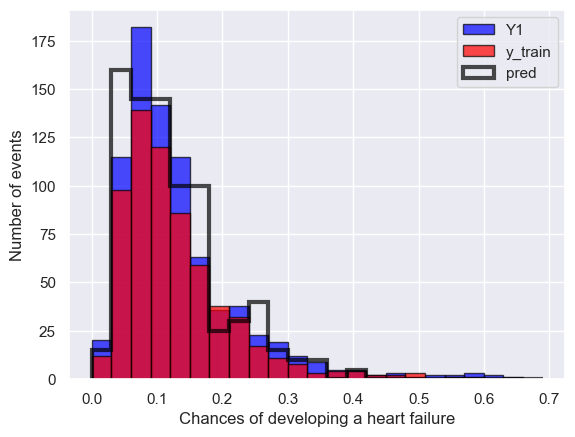

In [42]:
#Rescaled for visual purposes
plt.hist(Y1, bins=l, color='blue', alpha=0.7, label='Y1', histtype='bar', edgecolor='black')
plt.hist(y_pred_train, bins=l, color='red', alpha=0.7, label='y_train', histtype='bar', edgecolor='black')
plt.hist(np.concatenate((y_pred_test, y_pred_test, y_pred_test, y_pred_test,y_pred_test)),
         bins=l, color='green', alpha=0.7, label='pred', histtype='step', edgecolor='black',linewidth=3)

plt.xlabel('Chances of developing a heart failure')
plt.ylabel('Number of events')

plt.legend()
plt.show()

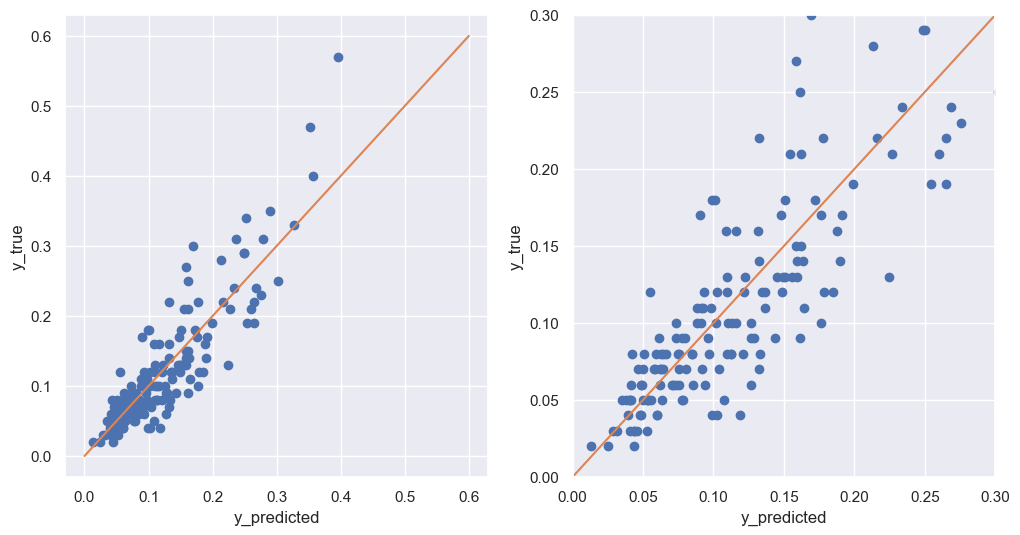

In [43]:
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

axis[0].plot(y_pred_test, y_test, marker='o', linestyle='None')
axis[0].plot([0, 0.4, 0.6], [0, 0.4, 0.6])
axis[0].set_xlabel("y_predicted")
axis[0].set_ylabel("y_true")

axis[1].plot(y_pred_test, y_test, marker='o', linestyle='None')
axis[1].plot([0, 0.3], [0, 0.3])
axis[1].set_xlim(0, 0.3)
axis[1].set_ylim(0, 0.3)
axis[1].set_xlabel("y_predicted")
axis[1].set_ylabel("y_true")

plt.show()

#### Hyper-parameter tuning

In [56]:
hidden_layer_sizes = [16,32,64,128,256]
learning_rate=[0.01,0.001]
max_iter = [8,16,32,64,128]

rmse_l = []
rmse_hyper = []

for i in hidden_layer_sizes : 
    print("hidden layer ", i)
    for j in learning_rate : 
        print("LR ", j)
        for k in max_iter :
            print("iter : ", k)
            mlp = MLPRegressor(hidden_layer_sizes = (i,i),
               learning_rate = "adaptive",
               learning_rate_init= j, 
               max_iter=k)

            sfs = SequentialFeatureSelector(estimator = mlp,
                            n_features_to_select = 6,
                            scoring = "neg_root_mean_squared_error",
                            direction = "forward",
                            cv=2)

            sfs.fit(X_train,y_train)

            feat = X_train.columns[sfs.get_support()]

            r = evaluate_feature_selection(X_train, X_test, y_train, y_test, mlp, feat)  
            rmse_l.append(r)
            rmse_hyper.append([i, j, k])
print(rmse_l)
min_index = rmse_l.index(min(rmse_l))
print(rmse_l[min_index])
print(rmse_hyper[min_index])

hidden layer  16
LR  0.01
iter :  8
iter :  16
iter :  32
iter :  64
iter :  128
LR  0.001
iter :  8
iter :  16
iter :  32
iter :  64
iter :  128
hidden layer  32
LR  0.01
iter :  8
iter :  16
iter :  32
iter :  64
iter :  128
LR  0.001
iter :  8
iter :  16
iter :  32
iter :  64
iter :  128
hidden layer  64
LR  0.01
iter :  8
iter :  16
iter :  32
iter :  64
iter :  128
LR  0.001
iter :  8
iter :  16
iter :  32
iter :  64
iter :  128
hidden layer  128
LR  0.01
iter :  8
iter :  16
iter :  32
iter :  64
iter :  128
LR  0.001
iter :  8
iter :  16
iter :  32
iter :  64
iter :  128
hidden layer  256
LR  0.01
iter :  8
iter :  16
iter :  32
iter :  64
iter :  128
LR  0.001
iter :  8
iter :  16
iter :  32
iter :  64
iter :  128
[0.0724662874096852, 0.09501308926976884, 0.06591875627359887, 0.05709110665202563, 0.05422379179570566, 0.27631827320285635, 0.19944772095588337, 0.15461704763062775, 0.12190720570439058, 0.0772325770027211, 0.1026796378861964, 0.060057996038832315, 0.055771883700181

In [46]:
rmse_list = []
for i in range(1,len(selected_features)):
    feature_to_select = i
    sfs = SequentialFeatureSelector(estimator = mlp, 
                                    n_features_to_select=feature_to_select, 
                                    scoring = "neg_root_mean_squared_error",
                                   direction = "forward",
                                   cv = 2)
    sfs.fit(X_train,y_train)
    feat = X_train.columns[sfs.get_support()]
    r = evaluate_feature_selection(X_train, X_test, y_train, y_test, reg, feat)
    rmse_list.append([r,i,X_train.columns[sfs.get_support()]])

print(min(rmse_list))

[0.05447015257194506, 6, Index(['blood pressure', 'cholesterol', 'physical activity', 'weight',
       'h1_pca', 'h2_pca'],
      dtype='object')]


### KNN

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10, weights = 'distance')

In [45]:
start_time = time.time()

knn.fit(X_train,y_train)

y_pred_train = knn.predict(X_train)
print("RMSE on train set : ",mean_squared_error(y_train,y_pred_train, squared = False))

y_pred_test = knn.predict(X_test)
rmse_test_knn = mean_squared_error(y_test,y_pred_test, squared = False)
print("RMSE on test set : ",mean_squared_error(y_test,y_pred_test, squared = False))

print("--- %s seconds ---" % (time.time() - start_time))

RMSE on train set :  0.0
RMSE on test set :  0.047726815798562236
--- 0.025990724563598633 seconds ---


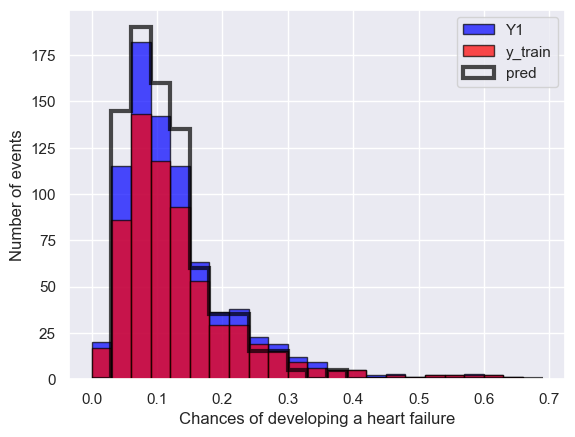

In [46]:
plt.hist(Y1, bins=l, color='blue', alpha=0.7, label='Y1', histtype='bar', edgecolor='black')
plt.hist(y_pred_train, bins=l, color='red', alpha=0.7, label='y_train', histtype='bar', edgecolor='black')
plt.hist(np.concatenate([y_pred_test, y_pred_test, y_pred_test, y_pred_test, y_pred_test]), bins=l, color='green', alpha=0.7, label='pred', histtype='step', edgecolor='black', linewidth=3)

plt.xlabel('Chances of developing a heart failure')
plt.ylabel('Number of events')

plt.legend()
plt.show()

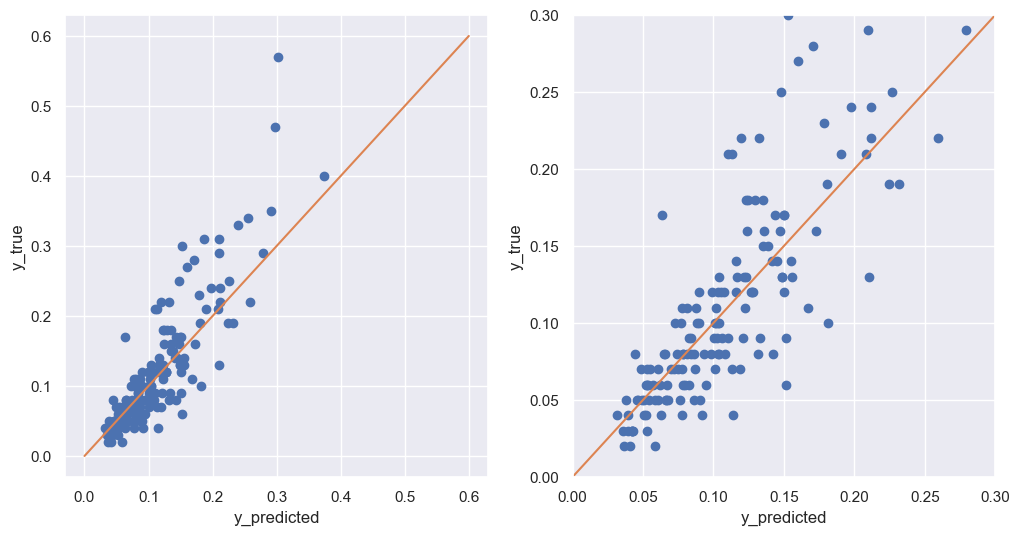

In [47]:
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

axis[0].plot(y_pred_test, y_test, marker='o', linestyle='None')
axis[0].plot([0, 0.4, 0.6], [0, 0.4, 0.6])
axis[0].set_xlabel("y_predicted")
axis[0].set_ylabel("y_true")

axis[1].plot(y_pred_test, y_test, marker='o', linestyle='None')
axis[1].plot([0, 0.3], [0, 0.3])
axis[1].set_xlim(0, 0.3)
axis[1].set_ylim(0, 0.3)
axis[1].set_xlabel("y_predicted")
axis[1].set_ylabel("y_true")

plt.show()

#### Hyper-parameter tuning

In [ ]:
n_neigh = [2,5,10,15,20]
weights = ['uniform', 'distance']
rmse_l = []
rmse_hyper = []
for i in n_neigh :
    print("neighbors : ", i)
    for j in weights : 
        knn = KNeighborsRegressor(n_neighbors= i , weights = j)
        sfs = SequentialFeatureSelector(estimator = knn,
                            n_features_to_select = 6,
                            scoring = "neg_root_mean_squared_error",
                            direction = "forward",
                            cv=2)

        sfs.fit(X_train,y_train)

        feat = X_train.columns[sfs.get_support()]

        r = evaluate_feature_selection(X_train, X_test, y_train, y_test, knn, feat)  
        rmse_l.append(r)
        rmse_hyper.append([i, j])
min_index = rmse_l.index(min(rmse_l))
print(rmse_l[min_index])
print(rmse_hyper[min_index])

In [ ]:
rmse_list = []
for i in range(1,len(selected_features)):
    feature_to_select = i
    sfs = SequentialFeatureSelector(estimator = knn, 
                                    n_features_to_select=feature_to_select, 
                                    scoring = "neg_root_mean_squared_error",
                                   direction = "forward",
                                   cv = 2)
    sfs.fit(X_train,y_train)
    feat = X_train.columns[sfs.get_support()]
    r = evaluate_feature_selection(X_train, X_test, y_train, y_test, reg, feat)
    rmse_list.append([r,i,X_train.columns[sfs.get_support()]])

print(min(rmse_list))

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

start_time = time.time()
rf = RandomForestRegressor(n_estimators = 100, criterion = 'squared_error' , max_depth = 10)
rf.fit(X_train, y_train);

y_pred_train = rf.predict(X_train)
print("RMSE on train set : " ,mean_squared_error(y_train,y_pred_train, squared = False))

y_pred_test = rf.predict(X_test)
rmse_test_rf = mean_squared_error(y_test,y_pred_test, squared = False)
print("RMSE on test set : ", mean_squared_error(y_test,y_pred_test, squared = False))

print("--- %s seconds ---" % (time.time() - start_time))

RMSE on train set :  0.02003180319439965
RMSE on test set :  0.0504475033702954
--- 0.4370419979095459 seconds ---


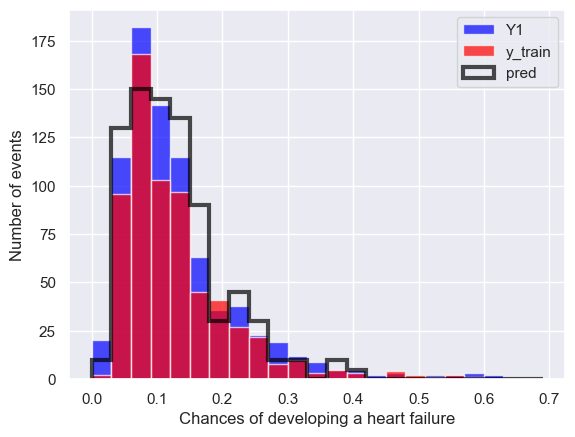

In [49]:
plt.hist(Y1,bins = l, color='blue', alpha=0.7, label='Y1')
plt.hist(y_pred_train,bins = l, color='red', alpha=0.7, label='y_train')
plt.hist(np.concatenate((y_pred_test, y_pred_test, y_pred_test, y_pred_test, y_pred_test)), bins = l, color='black', alpha=0.7, label='pred', histtype='step', edgecolor='black',linewidth=3)

plt.xlabel('Chances of developing a heart failure')
plt.ylabel('Number of events')

plt.legend()
plt.show()

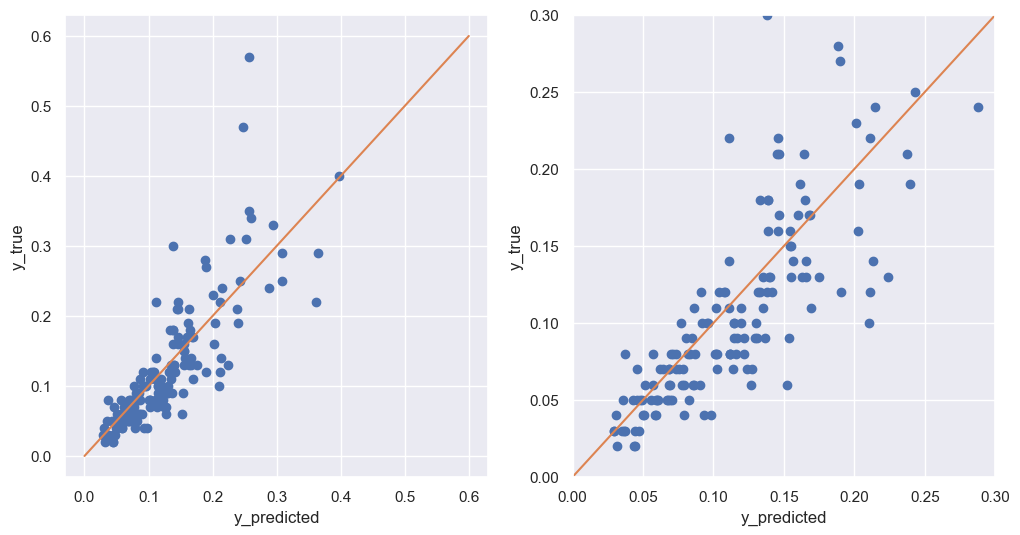

In [50]:
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

axis[0].plot(y_pred_test, y_test, marker='o', linestyle='None')
axis[0].plot([0, 0.4, 0.6], [0, 0.4, 0.6])
axis[0].set_xlabel("y_predicted")
axis[0].set_ylabel("y_true")

axis[1].plot(y_pred_test, y_test, marker='o', linestyle='None')
axis[1].plot([0, 0.3], [0, 0.3])
axis[1].set_xlim(0, 0.3)
axis[1].set_ylim(0, 0.3)
axis[1].set_xlabel("y_predicted")
axis[1].set_ylabel("y_true")

plt.show()

#### Hyper-parameter tuning

In [53]:
n_est = [10, 30, 100]
crit = ['squared_error', 'absolute_error']
max_depth = [2, 6, 10 , None]
rmse_l = []
rmse_hyper = []
for i in n_est :
    print("neighbors : ", i)
    for j in crit : 
        for k in max_depth:
            rf = RandomForestRegressor(n_estimators = i, criterion = j, max_depth = k)
            sfs = SequentialFeatureSelector(estimator = rf,
                                n_features_to_select = 6,
                                scoring = "neg_root_mean_squared_error",
                                direction = "forward",
                                cv=2)

            sfs.fit(X_train,y_train)

            feat = X_train.columns[sfs.get_support()]

            r = evaluate_feature_selection(X_train, X_test, y_train, y_test, rf, feat)  
            rmse_l.append(r)
            rmse_hyper.append([i, j, k])
min_index = rmse_l.index(min(rmse_l))
print(rmse_l[min_index])
print(rmse_hyper[min_index])

neighbors :  10
neighbors :  30
neighbors :  100
0.04973752968709846
[100, 'absolute_error', 6]


In [ ]:
rmse_list = []
for i in range(1,len(selected_features)):
    feature_to_select = i
    sfs = SequentialFeatureSelector(estimator = rf, 
                                    n_features_to_select=feature_to_select, 
                                    scoring = "neg_root_mean_squared_error",
                                   direction = "forward",
                                   cv = 2)
    sfs.fit(X_train,y_train)
    feat = X_train.columns[sfs.get_support()]
    r = evaluate_feature_selection(X_train, X_test, y_train, y_test, reg, feat)
    rmse_list.append([r,i,X_train.columns[sfs.get_support()]])

print(min(rmse_list))

### Prediction on X2

In [51]:
scX2 = StandardScaler()
scX2.fit(X2)
X2 = pd.DataFrame(scX2.transform(X2), columns=X2.columns)

In [52]:
list_all_rmse = [rmse_test_mlp, rmse_test_sgd, rmse_test_linreg, rmse_test_knn, rmse_test_rf]

print("The best model according to RMSE is : ")

# MLP
if min(list_all_rmse) == list_all_rmse[0]:
    print("MLP : ", min(list_all_rmse))
    
    Y2 = mlp.predict(X2)
    
# SGD    
elif min(list_all_rmse) == list_all_rmse[1]:
    print("SGD : ", min(list_all_rmse))
    
    Y2 = sgd.predict(X2)
    
#LinReg
elif min(list_all_rmse) == list_all_rmse[2]:
    print("LinReg : ", min(list_all_rmse))
    
    Y2 = reg.predict(X2)
    
#KNN
elif min(list_all_rmse) == list_all_rmse[3]:
    print("KNN : ", min(list_all_rmse))
    
    Y2 = knn.predict(X2)
    
#RF
elif min(list_all_rmse) == list_all_rmse[4]:
    print("RF : ", min(list_all_rmse))
    
    Y2 = rf.predict(X2)

The best model according to RMSE is : 
MLP :  0.04138364494345904


In [53]:
with open("C:\\Users\\kaczb\\Desktop\\Machine learning\\Y2.txt", 'w') as writer:
    np.savetxt(writer, Y2)
    writer.write(str(min(list_all_rmse).item()))

#### We check if Y2 contains plausible results compared to Y1

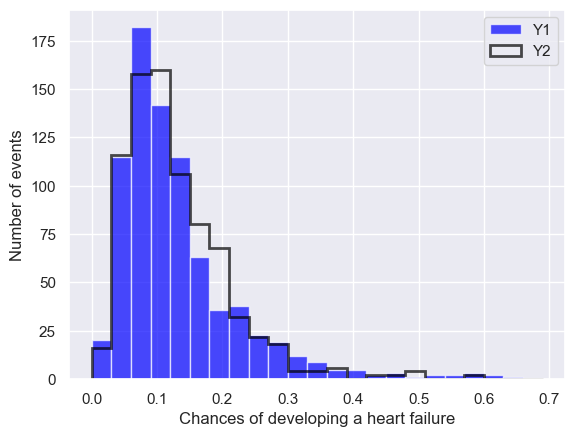

In [54]:
plt.hist(Y1,bins = l, color='blue', alpha=0.7, label='Y1')
plt.hist(np.concatenate((Y2,Y2), axis = 0),bins = l, color='black', alpha=0.7, label='Y2', histtype='step', edgecolor='black',linewidth=2)

plt.xlabel('Chances of developing a heart failure')
plt.ylabel('Number of events')

plt.legend()
plt.show()